# **Answer: 9.08 Secs ~ 9 Secs** Please go through the code to see the work

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

**Given: **An ant leaves its anthill in order to forage for food. It moves with the speed of 10cm per second, but it doesn't know where to go, therefore every second it moves randomly 10cm directly north, south, east or west with equal probability.

Problem Statement: Can you write a program that comes up with an estimate of average time to find food for any closed boundary around the anthill? What would be the answer if food is located outside an area defined by ( (x – 2.5cm) / 30cm )^2 + ( (y – 2.5cm) / 40cm )^2 < 1 in coordinate system where the anthill is located at (x = 0cm, y = 0cm)?

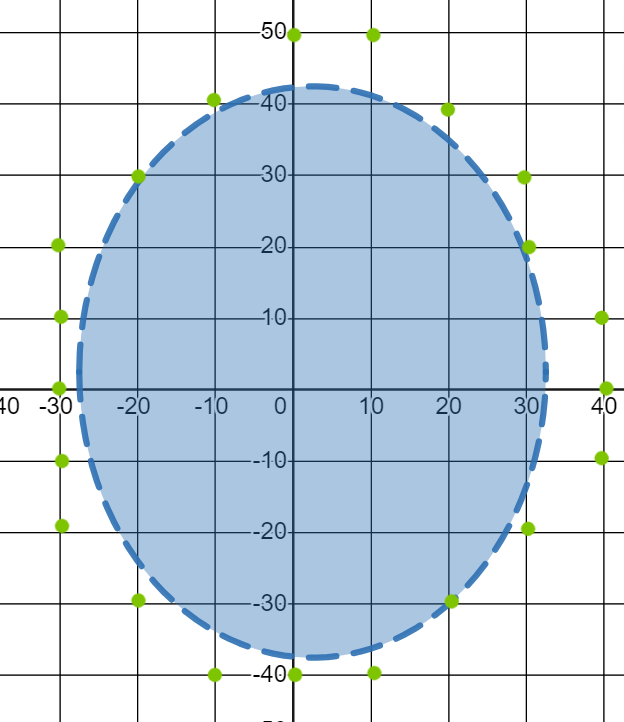

In the figure above the ant is at co-ordinate (0,0) and the food is outside the colored area. We have divided the ground in segements of graph of 10x10 cm. In order to find the food the ant has to reach the green dots

The co-ordinates of the green dots are {(-30,0),(-30,-10),(-30,-20),(-20,-30),(-10,-40),(0,-40),(10,-40),(20,-30),(30,-20),(40,-10),(40,0),(40,10),(30,20),(30,30),(20,40),(10,50),(0,50),(-10,40),(-20,30),(-30,20),(-30,10)}

These would be our final positions

In [ ]:
arr= np.empty((10,8), dtype= tuple)
x= list()
for i in range(8):
  y= list()
  for j in range(10):
    #y.append((i,j))
    arr[j,i]= ((i-3)*10,(j-5)*-10)

In [ ]:
arr

array([[(-30, 50), (-20, 50), (-10, 50), (0, 50), (10, 50), (20, 50),
        (30, 50), (40, 50)],
       [(-30, 40), (-20, 40), (-10, 40), (0, 40), (10, 40), (20, 40),
        (30, 40), (40, 40)],
       [(-30, 30), (-20, 30), (-10, 30), (0, 30), (10, 30), (20, 30),
        (30, 30), (40, 30)],
       [(-30, 20), (-20, 20), (-10, 20), (0, 20), (10, 20), (20, 20),
        (30, 20), (40, 20)],
       [(-30, 10), (-20, 10), (-10, 10), (0, 10), (10, 10), (20, 10),
        (30, 10), (40, 10)],
       [(-30, 0), (-20, 0), (-10, 0), (0, 0), (10, 0), (20, 0), (30, 0),
        (40, 0)],
       [(-30, -10), (-20, -10), (-10, -10), (0, -10), (10, -10),
        (20, -10), (30, -10), (40, -10)],
       [(-30, -20), (-20, -20), (-10, -20), (0, -20), (10, -20),
        (20, -20), (30, -20), (40, -20)],
       [(-30, -30), (-20, -30), (-10, -30), (0, -30), (10, -30),
        (20, -30), (30, -30), (40, -30)],
       [(-30, -40), (-20, -40), (-10, -40), (0, -40), (10, -40),
        (20, -40), (30, -40)

In [ ]:
G= nx.Graph()

In [ ]:
for i in range(-30,40,10):
  for j in range(-40,50,10):
    G.add_node((i,j))


In [ ]:
row_n=10
col_n=8
for row in range(row_n):
    for col in range(col_n):
        node = row *row_n + col
        #print((row-2,col-2), end=" ")

        # Add edges to neighbors (up, down, left, right)
        if row > 0:  # Up
          G.add_edge(arr[row][col], arr[row-1][col], p=0.25)
            #adj[node][node - n] = 0.25
        if row < row_n - 1:  # Down
          G.add_edge(arr[row][col], arr[row+1][col], p=0.25)
            #adj[node][node + n] = 0.25
        if col > 0:  # Left
            #adj[node][node - 1] = 0.25
            G.add_edge(arr[row][col], arr[row][col-1], p=0.25)
        if col < col_n-1:  # Right
            #adj[node][node + 1] = 0.25
            G.add_edge(arr[row][col], arr[row][col+1], p=0.25)

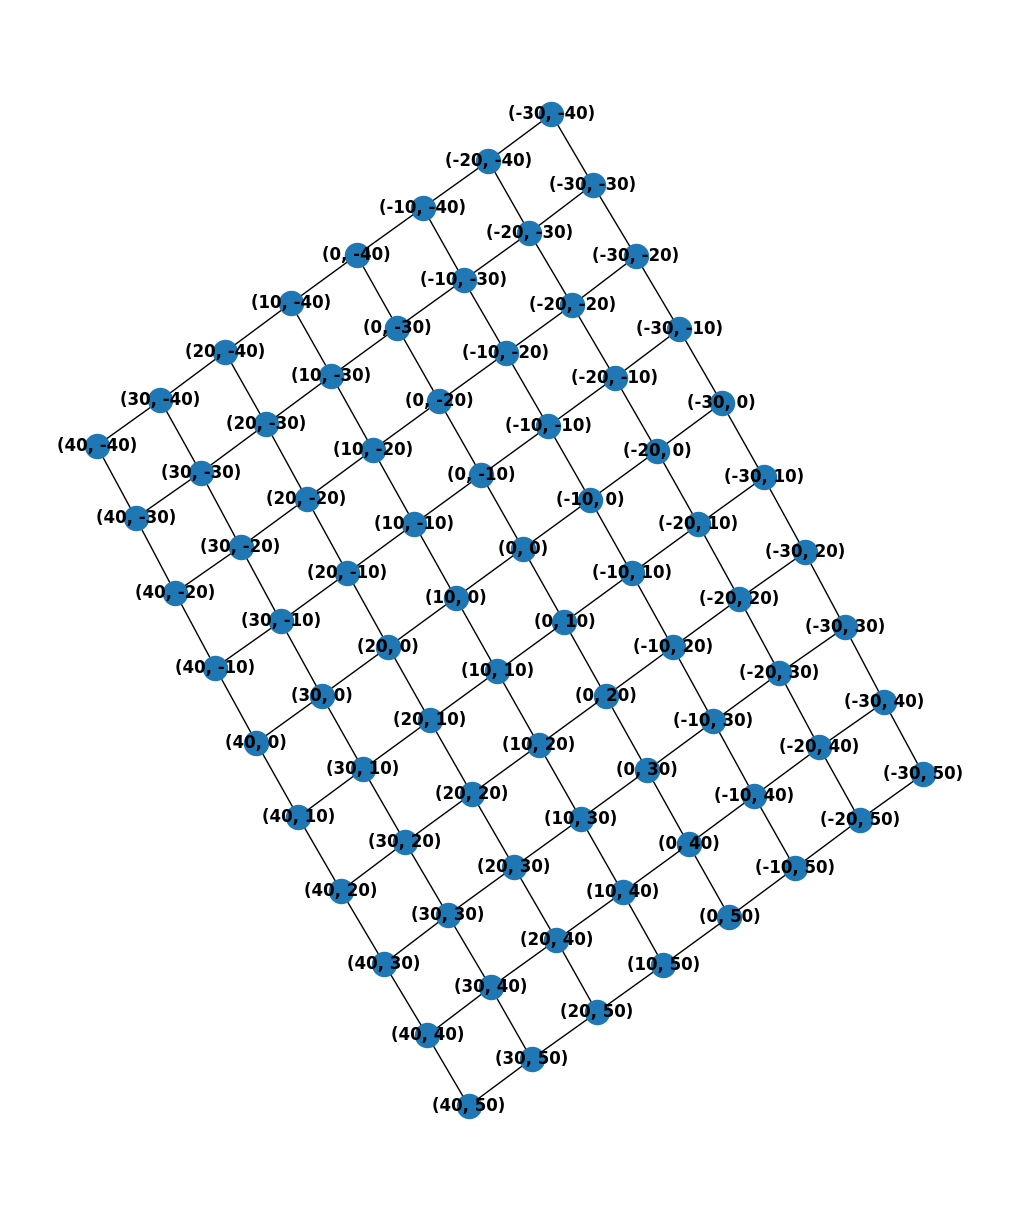

In [ ]:
# prompt: plot a nx graph
 # Get positions of nodes
# pos = nx.get_node_attributes(G, 'pos')
# nx.draw(G, pos, with_labels=True, node_size=50, node_color="skyblue", font_size=10, font_weight="bold")


plt.figure(figsize=(10, 12))

nx.draw(G, with_labels=True, font_weight='bold', pos=nx.kamada_kawai_layout(G))


In [ ]:
#get the adjancecy matrix
adj= nx.adjacency_matrix(G,weight='p').todense()
adj

array([[0.  , 0.25, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.25, 0.  , 0.25, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.25, 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.25, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.25, 0.  , 0.25],
       [0.  , 0.  , 0.  , ..., 0.  , 0.25, 0.  ]])

In [ ]:
##Filter out all the co-ordinates at border of food
F= {(-30,0),(-30,-10),(-30,-20),(-20,-30),(-10,-40),(0,-40),(10,-40),(20,-30),(30,-20),(40,-10),(40,0),(40,10),(30,20),(30,30),(20,40),(10,50),(0,50),(-10,40),(-20,30),(-30,20),(-30,10)}

In [ ]:
food_positions=[]

i=0
for row in range(arr.shape[0]):
  for col in range(arr.shape[1]):
    if arr[row][col] in F:
      food_positions.append(i)
    if arr[row][col] == (0,0):
      initial_position=i
    i+=1

In [ ]:
food_positions

[3,
 4,
 10,
 13,
 17,
 22,
 24,
 30,
 32,
 39,
 40,
 47,
 48,
 55,
 56,
 62,
 65,
 69,
 74,
 75,
 76]

In [ ]:
arr[1][0], arr.shape

((-30, 40), (10, 8))

So the border/line for the area is  ( (x – 2.5cm) / 30cm )^2 + ( (y – 2.5cm) / 40cm )^2 =1
The area can be simplified into
which can be simplified into 4(x^2)-5x+ 90y=3800

In [ ]:
result=[]
time_taken=0
i=initial_position
remaining=1
adj_= adj.copy()
for n in range(1,500):
  adj_=np.linalg.matrix_power(adj, n)
  p=0

  for j in food_positions:
    p+= adj_[i][j]
  success= remaining*p

  time_taken+= n*success
  remaining= remaining* (1- p)
  print(n,":",round(success,2),round(time_taken,2) )
  result.append(time_taken)

1 : 0.0 0.0
2 : 0.0 0.0
3 : 0.16 0.47
4 : 0.06 0.69
5 : 0.16 1.48
6 : 0.06 1.83
7 : 0.12 2.68
8 : 0.05 3.05
9 : 0.08 3.81
10 : 0.03 4.14
11 : 0.06 4.77
12 : 0.02 5.04
13 : 0.04 5.55
14 : 0.02 5.77
15 : 0.03 6.17
16 : 0.01 6.34
17 : 0.02 6.66
18 : 0.01 6.8
19 : 0.01 7.05
20 : 0.01 7.16
21 : 0.01 7.36
22 : 0.0 7.45
23 : 0.01 7.61
24 : 0.0 7.68
25 : 0.01 7.82
26 : 0.0 7.88
27 : 0.0 7.98
28 : 0.0 8.03
29 : 0.0 8.12
30 : 0.0 8.16
31 : 0.0 8.24
32 : 0.0 8.27
33 : 0.0 8.34
34 : 0.0 8.37
35 : 0.0 8.42
36 : 0.0 8.45
37 : 0.0 8.49
38 : 0.0 8.51
39 : 0.0 8.55
40 : 0.0 8.57
41 : 0.0 8.61
42 : 0.0 8.62
43 : 0.0 8.65
44 : 0.0 8.67
45 : 0.0 8.7
46 : 0.0 8.71
47 : 0.0 8.73
48 : 0.0 8.74
49 : 0.0 8.77
50 : 0.0 8.78
51 : 0.0 8.79
52 : 0.0 8.8
53 : 0.0 8.82
54 : 0.0 8.83
55 : 0.0 8.84
56 : 0.0 8.85
57 : 0.0 8.87
58 : 0.0 8.87
59 : 0.0 8.88
60 : 0.0 8.89
61 : 0.0 8.9
62 : 0.0 8.91
63 : 0.0 8.92
64 : 0.0 8.92
65 : 0.0 8.93
66 : 0.0 8.94
67 : 0.0 8.94
68 : 0.0 8.95
69 : 0.0 8.95
70 : 0.0 8.96
71 : 0.0 8.97


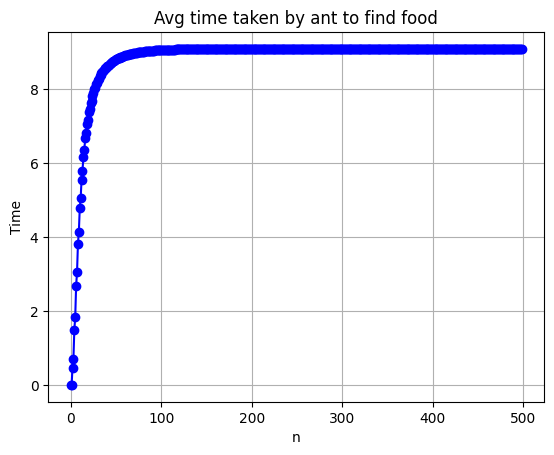

In [ ]:

# Plot the function
plt.plot(range(len(result)), result, marker='o', linestyle='-', color='b')
plt.title('Avg time taken by ant to find food')
plt.xlabel('n')
plt.ylabel('Time')
plt.grid(True)
plt.show()